In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../data/levelized-cost-of-energy.csv')
# data = data.fillna(data[columns].mean())
df = df[df["Year"] > 2000]
df = df[df["Entity"]== "World"]

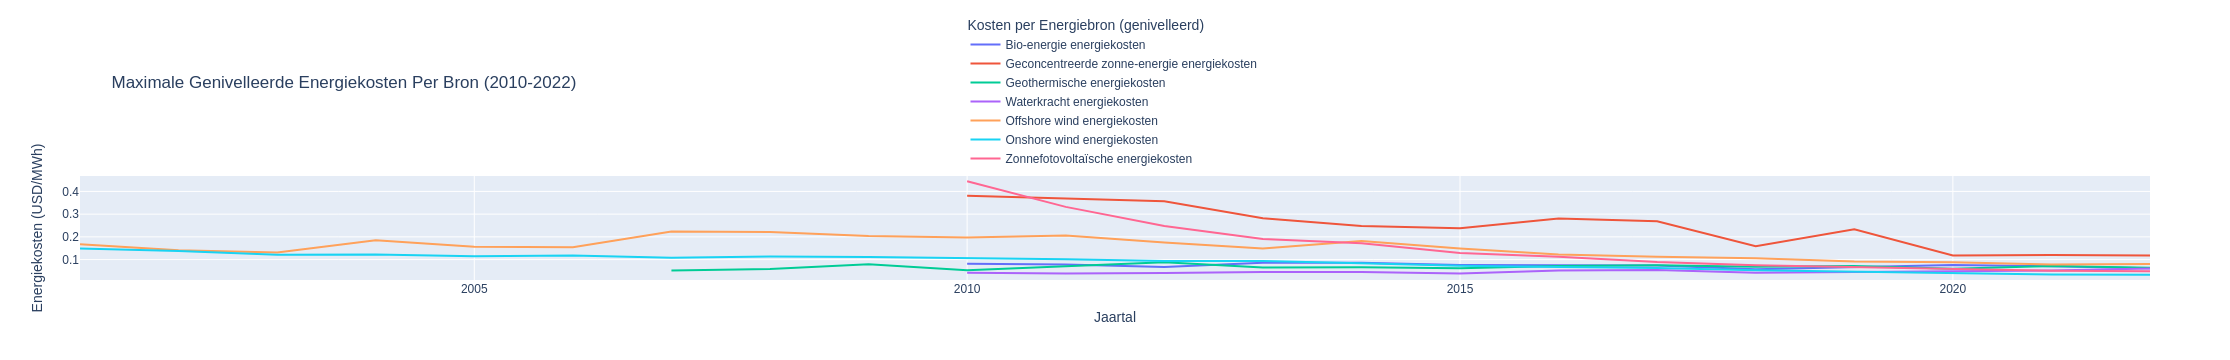

In [17]:
import pandas as pd
import plotly.express as px

# Define the columns to check
columns_to_check = [
    'Bioenergy levelized cost of energy', 
    'Geothermal levelized cost of energy', 
    'Offshore wind levelized cost of energy', 
    'Solar photovoltaic levelized cost of energy', 
    'Concentrated solar power levelized cost of energy', 
    'Hydropower levelized cost of energy', 
    'Onshore wind levelized cost of energy'
]

# Drop rows where all specified columns have NaN values
df = df.dropna(subset=columns_to_check, how='all')

# Interpolate 'Geothermal levelized cost of energy' for years between 2010 and 2015
mask = (df['Year'] >= 2010) & (df['Year'] <= 2015)
df.loc[mask, 'Geothermal levelized cost of energy'] = df.loc[mask, 'Geothermal levelized cost of energy'].interpolate(method='linear')

# Melt the DataFrame to a long format for Plotly
df_long = df.melt(id_vars=['Year'], 
                  value_vars=columns_to_check, 
                  var_name='Energy Type', 
                  value_name='Cost of Energy')

# Group by Year and Energy Type, and find the maximum cost for each group
df_max = df_long.groupby(['Year', 'Energy Type']).max().reset_index()

# Translation map from English to Dutch
translation_map = {
    'Bioenergy levelized cost of energy': 'Bio-energie energiekosten',
    'Geothermal levelized cost of energy': 'Geothermische energiekosten',
    'Offshore wind levelized cost of energy': 'Offshore wind energiekosten',
    'Solar photovoltaic levelized cost of energy': 'Zonnefotovoltaïsche energiekosten',
    'Concentrated solar power levelized cost of energy': 'Geconcentreerde zonne-energie energiekosten',
    'Hydropower levelized cost of energy': 'Waterkracht energiekosten',
    'Onshore wind levelized cost of energy': 'Onshore wind energiekosten',
    'Cost of Energy': 'Energiekosten (USD/MWh)',
    'Year': 'Jaartal',
    'Energy Type': 'Kosten per Energiebron (genivelleerd)'
}

# Apply the translation map to the DataFrame
df_max['Energy Type'] = df_max['Energy Type'].map(translation_map)

# Plot the data using Plotly
fig = px.line(df_max, x='Year', y='Cost of Energy', color='Energy Type',
              title='Maximale Genivelleerde Energiekosten Per Bron (2010-2022)',
              labels={'Cost of Energy': translation_map['Cost of Energy'], 'Year': translation_map['Year'], 'Energy Type': translation_map['Energy Type']})

# Update layout to position the legend above the graph and avoid overlap with the title
fig.update_layout(
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100)  # Increase top margin to ensure title does not overlap with legend
)

# Show the plot
fig.show()


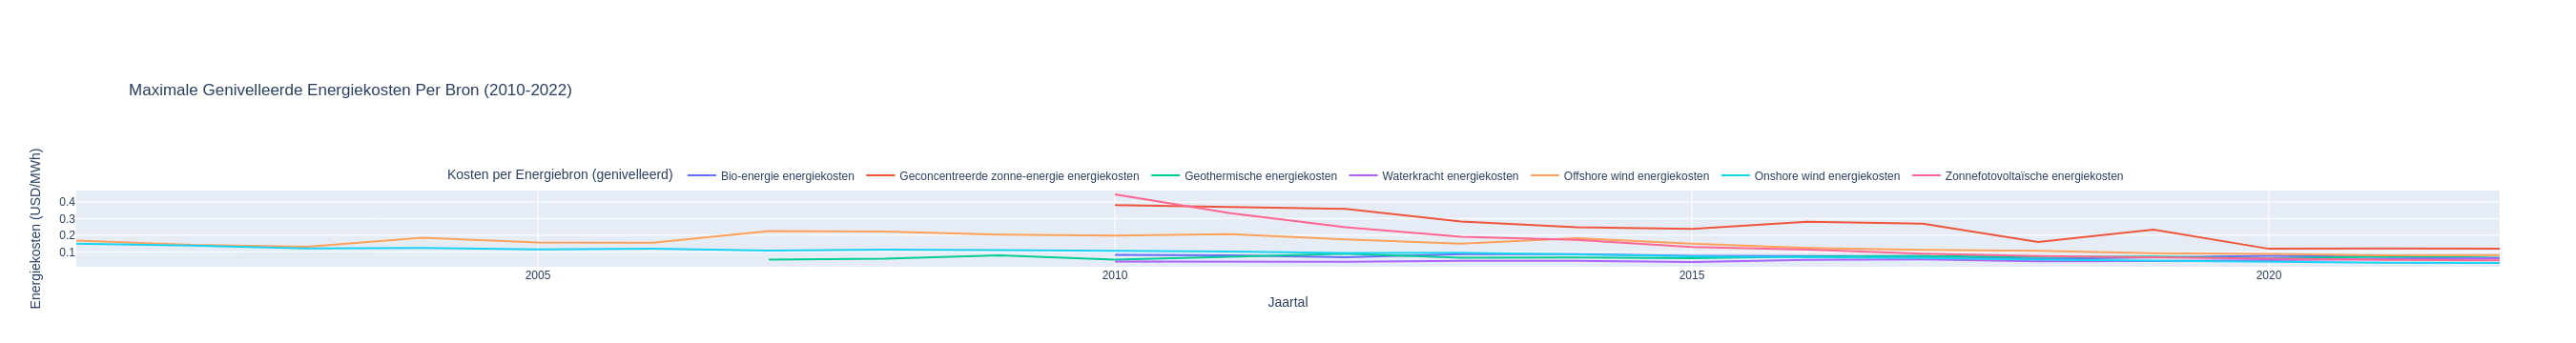

In [20]:
import pandas as pd
import plotly.express as px

# Define the columns to check
columns_to_check = [
    'Bioenergy levelized cost of energy', 
    'Geothermal levelized cost of energy', 
    'Offshore wind levelized cost of energy', 
    'Solar photovoltaic levelized cost of energy', 
    'Concentrated solar power levelized cost of energy', 
    'Hydropower levelized cost of energy', 
    'Onshore wind levelized cost of energy'
]

# Drop rows where all specified columns have NaN values
df = df.dropna(subset=columns_to_check, how='all')

# Interpolate 'Geothermal levelized cost of energy' for years between 2010 and 2015
mask = (df['Year'] >= 2010) & (df['Year'] <= 2015)
df.loc[mask, 'Geothermal levelized cost of energy'] = df.loc[mask, 'Geothermal levelized cost of energy'].interpolate(method='linear')

# Melt the DataFrame to a long format for Plotly
df_long = df.melt(id_vars=['Year'], 
                  value_vars=columns_to_check, 
                  var_name='Energy Type', 
                  value_name='Cost of Energy')

# Group by Year and Energy Type, and find the maximum cost for each group
df_max = df_long.groupby(['Year', 'Energy Type']).max().reset_index()

# Translation map from English to Dutch
translation_map = {
    'Bioenergy levelized cost of energy': 'Bio-energie energiekosten',
    'Geothermal levelized cost of energy': 'Geothermische energiekosten',
    'Offshore wind levelized cost of energy': 'Offshore wind energiekosten',
    'Solar photovoltaic levelized cost of energy': 'Zonnefotovoltaïsche energiekosten',
    'Concentrated solar power levelized cost of energy': 'Geconcentreerde zonne-energie energiekosten',
    'Hydropower levelized cost of energy': 'Waterkracht energiekosten',
    'Onshore wind levelized cost of energy': 'Onshore wind energiekosten',
    'Cost of Energy': 'Energiekosten (USD/MWh)',
    'Year': 'Jaartal',
    'Energy Type': 'Kosten per Energiebron (genivelleerd)'
}

# Apply the translation map to the DataFrame
df_max['Energy Type'] = df_max['Energy Type'].map(translation_map)

# Plot the data using Plotly
fig = px.line(df_max, x='Year', y='Cost of Energy', color='Energy Type',
              title='Maximale Genivelleerde Energiekosten Per Bron (2010-2022)',
              labels={'Cost of Energy': translation_map['Cost of Energy'], 'Year': translation_map['Year'], 'Energy Type': translation_map['Energy Type']})

# Update layout to position the legend above the graph and avoid overlap with the title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=200)  # Increase top margin to ensure title does not overlap with legend
)

# Show the plot
fig.show()